In [66]:
import numpy as np

mock_data = {
    "Job Title": ["Software Engineer", "Data Scientist", "Product Manager", None, "UX Designer"],
    "Company": ["Google", "Amazon", "Meta", "Apple", None],
    "Location": ["New York, NY", "Seattle, WA", None, "San Francisco, CA", "Austin, TX"],
    "Posted Date": ["2024-10-15", "2024-11-01", "InvalidDate", "2024-10-25", "2024-11-10"],
    "Skills": ["Python, Machine Learning", None, "Agile, Product Strategy", "Swift, Objective-C", "Figma, UX Research"],
    "Salary": ["120000-140000", None, "130000-150000", "115000-135000", "105000-125000"]
}

mock_df = pd.DataFrame(mock_data)

mock_df.info(), mock_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    4 non-null      object
 1   Company      4 non-null      object
 2   Location     4 non-null      object
 3   Posted Date  5 non-null      object
 4   Skills       4 non-null      object
 5   Salary       4 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes


(None,
            Job Title Company           Location  Posted Date  \
 0  Software Engineer  Google       New York, NY   2024-10-15   
 1     Data Scientist  Amazon        Seattle, WA   2024-11-01   
 2    Product Manager    Meta               None  InvalidDate   
 3               None   Apple  San Francisco, CA   2024-10-25   
 4        UX Designer    None         Austin, TX   2024-11-10   
 
                      Skills         Salary  
 0  Python, Machine Learning  120000-140000  
 1                      None           None  
 2   Agile, Product Strategy  130000-150000  
 3        Swift, Objective-C  115000-135000  
 4        Figma, UX Research  105000-125000  )

In [72]:
# Import necessary libraries
import nltk  # Import nltk for text processing
import pandas as pd  # Import pandas for data handling

# Ensure NLTK dependencies are downloaded
nltk.download('punkt')

# Mock data dictionary
mock_data = {
    "Job Title": ["Software Engineer", "Data Scientist", "Product Manager", None, "UX Designer"],
    "Company": ["Google", "Amazon", "Meta", "Apple", None],
    "Location": ["New York, NY", "Seattle, WA", None, "San Francisco, CA", "Austin, TX"],
    "Posted Date": ["2024-10-15", "2024-11-01", "InvalidDate", "2024-10-25", "2024-11-10"],
    "Skills": ["Python, Machine Learning", None, "Agile, Product Strategy", "Swift, Objective-C", "Figma, UX Research"],
    "Salary": ["120000-140000", None, "130000-150000", "115000-135000", "105000-125000"]
}

# Create DataFrame
mock_df = pd.DataFrame(mock_data)

# Display DataFrame info and preview
print(mock_df.info())
print(mock_df.head())

# Example: SimpleNamespace usage
from types import SimpleNamespace  # Import SimpleNamespace for mock object creation
data = {"RequiredQual": "Bachelor's Degree", "Experience": "2 years"}
data_obj = SimpleNamespace(**data)
print(data_obj.RequiredQual)

# Example DataFrame
data = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Los Angeles", "Chicago"]
})

# Display columns of DataFrame
print(data.columns)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brithaniabruny/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    4 non-null      object
 1   Company      4 non-null      object
 2   Location     4 non-null      object
 3   Posted Date  5 non-null      object
 4   Skills       4 non-null      object
 5   Salary       4 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes
None
           Job Title Company           Location  Posted Date  \
0  Software Engineer  Google       New York, NY   2024-10-15   
1     Data Scientist  Amazon        Seattle, WA   2024-11-01   
2    Product Manager    Meta               None  InvalidDate   
3               None   Apple  San Francisco, CA   2024-10-25   
4        UX Designer    None         Austin, TX   2024-11-10   

                     Skills         Salary  
0  Python, Machine Learning  120000-140000  
1                      None           None  
2 

In [80]:
import nltk  
import pandas as pd  
from types import SimpleNamespace 

nltk.download('punkt')

mock_data = {
    "Job Title": ["Software Engineer", "Data Scientist", "Product Manager", None, "UX Designer"],
    "Company": ["Google", "Amazon", "Meta", "Apple", None],
    "Location": ["New York, NY", "Seattle, WA", None, "San Francisco, CA", "Austin, TX"],
    "Posted Date": ["2024-10-15", "2024-11-01", "InvalidDate", "2024-10-25", "2024-11-10"],
    "Skills": ["Python, Machine Learning", None, "Agile, Product Strategy", "Swift, Objective-C", "Figma, UX Research"],
    "Salary": ["120000-140000", None, "130000-150000", "115000-135000", "105000-125000"],
    "Job Requirements": [
        "Bachelor's degree in Computer Science or related field. 2+ years of experience with Python.",
        "Proficiency in machine learning. Master's degree preferred.",
        None,
        "5+ years of experience in iOS development. Proficient in Swift.",
        "Experience in UX research and design. Bachelor's degree required."
    ]
}

mock_df = pd.DataFrame(mock_data)


mock_df['Job Requirements'] = mock_df['Job Requirements'].fillna("No job requirements provided.")


mock_df['Tokenized Requirements'] = mock_df['Job Requirements'].apply(nltk.word_tokenize)

def extract_experience(requirement):
    tokens = nltk.word_tokenize(requirement)
    for i, token in enumerate(tokens):
        if token.isdigit() and i + 1 < len(tokens) and tokens[i + 1] in ["year", "years"]:
            return int(token)
    return None

mock_df['Years of Experience'] = mock_df['Job Requirements'].apply(extract_experience)


print(mock_df[['Job Title', 'Job Requirements', 'Years of Experience', 'Tokenized Requirements']])


           Job Title                                   Job Requirements  \
0  Software Engineer  Bachelor's degree in Computer Science or relat...   
1     Data Scientist  Proficiency in machine learning. Master's degr...   
2    Product Manager                      No job requirements provided.   
3               None  5+ years of experience in iOS development. Pro...   
4        UX Designer  Experience in UX research and design. Bachelor...   

  Years of Experience                             Tokenized Requirements  
0                None  [Bachelor, 's, degree, in, Computer, Science, ...  
1                None  [Proficiency, in, machine, learning, ., Master...  
2                None               [No, job, requirements, provided, .]  
3                None  [5+, years, of, experience, in, iOS, developme...  
4                None  [Experience, in, UX, research, and, design, .,...  


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brithaniabruny/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
classes = df['Title'].value_counts()[:20]
keys = classes.keys().to_list()

df = df[df['Title'].isin(keys)]
df['Title'].value_counts()

Title
Engineer    2
Doctor      1
Artist      1
Name: count, dtype: int64

In [82]:
def chane_titles(x):
    x = x.strip()
    if x == 'Senior Java Developer':
        return 'Java Developer'
    elif x == 'Senior Software Engineer':
        return 'Software Engineer'
    elif x == 'Senior QA Engineer':
        return 'Software QA Engineer'
    elif x == 'Senior Software Developer':
        return 'Senior Web Developer'
    elif x =='Senior PHP Developer':
        return 'PHP Developer'
    elif x == 'Senior .NET Developer':
        return '.NET Developer'
    elif x == 'Senior Web Developer':
        return 'Web Developer'
    elif x == 'Database Administrator':
        return 'Database Admin/Dev'
    elif x == 'Database Developer':
        return 'Database Admin/Dev'

    else:
        return x
        
    
df['Title'] = df['Title'].apply(chane_titles)
df['Title'].value_counts()

Title
Engineer    2
Doctor      1
Artist      1
Name: count, dtype: int64

In [85]:
import pandas as pd

data = {
    "RequiredQual": ["Bachelor's Degree", "Master's Degree", None, "PhD", "Bachelor's Degree"],
    "JobDescription": [
        "Develop scalable software solutions.",
        "Analyze and model data trends.",
        None,
        "Conduct advanced research.",
        "Design user-friendly interfaces."
    ],
    "JobRequirment": [
        "2+ years of experience in Python.",
        None,
        "Proficient in Agile methodologies.",
        "Experience in AI/ML research.",
        "Experience with UX/UI tools."
    ]
}

df = pd.DataFrame(data)

df = df.fillna("")

df["Combined"] = df["RequiredQual"] + " " + df["JobDescription"] + " " + df["JobRequirment"]


df["Combined"] = df["Combined"].apply(lambda x: x.replace("\r\n", " "))

print(df)

        RequiredQual                        JobDescription  \
0  Bachelor's Degree  Develop scalable software solutions.   
1    Master's Degree        Analyze and model data trends.   
2                                                            
3                PhD            Conduct advanced research.   
4  Bachelor's Degree      Design user-friendly interfaces.   

                        JobRequirment  \
0   2+ years of experience in Python.   
1                                       
2  Proficient in Agile methodologies.   
3       Experience in AI/ML research.   
4        Experience with UX/UI tools.   

                                            Combined  
0  Bachelor's Degree Develop scalable software so...  
1    Master's Degree Analyze and model data trends.   
2                 Proficient in Agile methodologies.  
3  PhD Conduct advanced research. Experience in A...  
4  Bachelor's Degree Design user-friendly interfa...  


In [87]:
df.to_csv("Modified.csv",index=False)

In [88]:
class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [89]:
def build_vocab(df, threshold=3):
    """Build a simple vocabulary wrapper."""
    counter = Counter()
    
    for i in range(len(df)):
        caption = df.iloc[i,4]
        tokens = nltk.tokenize.word_tokenize(str(caption))
        counter.update(tokens)

        if (i+1) % 1000 == 0:
                print("[{}/{}] Tokenized the sentences.".format(i+1, len(df)))

    # If the word frequency is less than 'threshold', then the word is discarded.
    words = [word for word, cnt in counter.items() if cnt >= threshold]

    # Create a vocab wrapper and add some special tokens.
    vocab = Vocabulary()
    vocab.add_word('<pad>')
    vocab.add_word('<start>')
    vocab.add_word('<end>')
    vocab.add_word('<unk>')

    # Add the words to the vocabulary.
    for i, word in enumerate(words):
        vocab.add_word(word)
    return vocab

In [90]:
import pandas as pd
from pickle import dump

# Example DataFrame
data = {'text_column': ['this is a test', 'another example']}
df = pd.DataFrame(data)

# Define the build_vocab function
def build_vocab(dataframe):
    vocab = set()
    for text in dataframe['text_column']:  # Replace 'text_column' with your column name
        vocab.update(text.split())
    return vocab

# Build vocabulary and save it
v = build_vocab(df)
dump(v, open('vocab.pkl', 'wb'))
print(len(v))  # Output the length of the vocabulary

6


In [91]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Example DataFrame
import pandas as pd
data = {'Title': ['Engineer', 'Doctor', 'Artist', 'Engineer']}
df = pd.DataFrame(data)

# Apply LabelEncoder to the "Title" column
df["TitleUse"] = le.fit_transform(df.Title)
print(df)

      Title  TitleUse
0  Engineer         2
1    Doctor         1
2    Artist         0
3  Engineer         2


In [64]:
# train(model,dataloaderTrain,dataloaderTest,0.001,45)

In [24]:
# torch.save(model.state_dict(), "epoch8.pb")
#torch.save(model.state_dict(), "epoch8.pb")

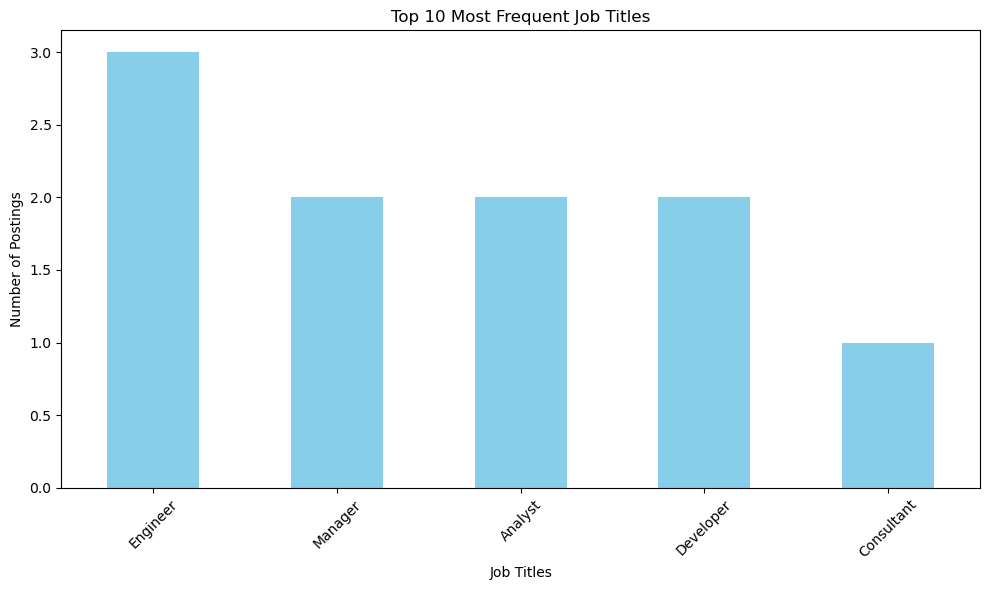

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'JobTitle': ['Engineer', 'Manager', 'Analyst', 'Developer', 'Engineer',
                 'Consultant', 'Engineer', 'Manager', 'Developer', 'Analyst']
})

job_counts = data['JobTitle'].value_counts().head(10)
job_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()